This notebook is me trying to figure out how to predict the most periods from MEarth as possible.

In [86]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from HeaderP import *


In [87]:
prots_raw = pd.read_table('ztfProts_split_newrun_fa', delimiter=',')
radec = pd.read_csv('MEarth_Rotator_List_v2.csv')

In [88]:
for i in range(1,8):
    prots_raw['SN'+str(i)]=prots_raw['maxpower'+str(i)]/prots_raw['medpower'+str(i)]

    bestid = prots_raw['id'].values
bestprot = np.zeros(len(prots_raw))
bestsn = np.zeros(len(prots_raw))

for i in trange(len(bestid)):
    prots_sing = prots_raw.iloc[i]
    allsn = np.array([prots_sing['SN'+str(j)] for j in range(1,8)])
    #allsn = np.array([prots_sing['medpower'+str(j)] for j in range(1,8)])
    allsn = allsn[allsn==allsn]
    bestprot[i] = prots_sing['prot'+str(np.argmax(allsn)+1)]
    #bestprot[i] = prots_sing['prot'+str(np.argmin(allsn)+1)]
    bestsn[i] = min(allsn)
prots_raw['bestprot'] = bestprot
prots_raw['bestSN'] = bestsn

df_cm = pd.merge(radec[['2MASS','Prot','Gmag']], prots_raw, left_on='2MASS', right_on='id', how='inner')





100%|██████████| 336/336 [00:00<00:00, 7708.01it/s]


86 336 0.25595238095238093


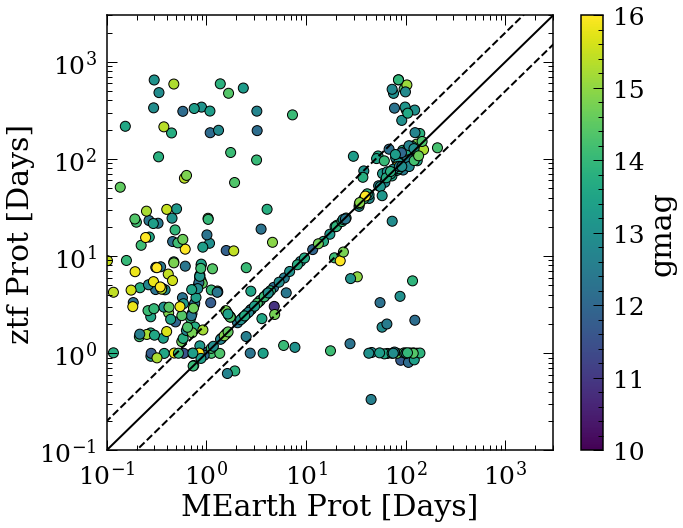

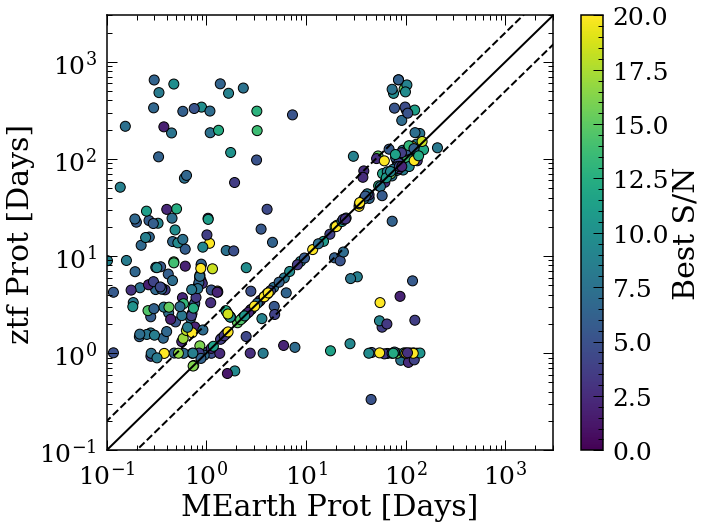

In [89]:
plt.figure(figsize=(10,8))
plt.scatter(df_cm['Prot'], df_cm['bestprot'], c=df_cm['Gmag'], s=100, 
            edgecolor='k', vmin=10, vmax=16)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('gmag')

plt.figure(figsize=(10,8))
plt.scatter(df_cm['Prot'], df_cm['bestprot'], c=df_cm['bestSN'], s=100, 
            edgecolor='k',vmin=0,vmax=20)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,3000], [0,3000], 'k-')
plt.plot([0,3000], [0,6000], 'k--')
plt.plot([0,6000], [0,3000], 'k--')
plt.xlim([0.1,3000])
plt.ylim([0.1,3000])
cb = plt.colorbar()
cb.set_label('Best S/N')

goodp = (abs(df_cm['bestprot']-df_cm['Prot'])/df_cm['Prot'])<0.1

print(sum(goodp), len(df_cm), sum(goodp)/len(df_cm))

In [90]:


goodp = (abs(df_cm['bestprot']-df_cm['Prot'])/df_cm['Prot'])<0.1

print('Best period:', sum(goodp), len(df_cm), sum(goodp)/len(df_cm))


df_cm['overall1'] = (abs(df_cm['prot1']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall2'] = (abs(df_cm['prot2']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall3'] = (abs(df_cm['prot3']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall4'] = (abs(df_cm['prot4']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall5'] = (abs(df_cm['prot5']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall6'] = (abs(df_cm['prot6']-df_cm['Prot'])/df_cm['Prot'])<0.1
df_cm['overall7'] = (abs(df_cm['prot7']-df_cm['Prot'])/df_cm['Prot'])<0.1
goodp = (abs(df_cm['prot1']-df_cm['Prot'])/df_cm['Prot'])<0.1
goodp = goodp|((abs(df_cm['prot2']-df_cm['Prot'])/df_cm['Prot'])<0.1)
goodp = goodp|((abs(df_cm['prot3']-df_cm['Prot'])/df_cm['Prot'])<0.1)
goodp = goodp|((abs(df_cm['prot4']-df_cm['Prot'])/df_cm['Prot'])<0.1)
goodp = goodp|((abs(df_cm['prot5']-df_cm['Prot'])/df_cm['Prot'])<0.1)
goodp = goodp|((abs(df_cm['prot6']-df_cm['Prot'])/df_cm['Prot'])<0.1)
goodp = goodp|((abs(df_cm['prot7']-df_cm['Prot'])/df_cm['Prot'])<0.1)
df_cm['overall'] = goodp
print(sum(df_cm['overall1']),sum(df_cm['overall2']),sum(df_cm['overall3']),
      sum(df_cm['overall4']),sum(df_cm['overall5']),sum(df_cm['overall6']),
     sum(df_cm['overall7']))
print(sum(goodp), sum(goodp)/len(df_cm))



bestid = df_cm['2MASS'].values
bestprot = np.zeros(len(df_cm))
maxprot = np.zeros(len(df_cm))
same2 = np.zeros(len(df_cm))
same2_maxpower = np.zeros(len(df_cm))
pstd = np.zeros(len(df_cm))

for i in trange(len(bestid)):
    prots_sing = df_cm.loc[df_cm['2MASS']==bestid[i]]
    oneprot = prots_sing[['prot1','prot2','prot3','prot4','prot5']].dropna(axis=1).values[0]
    maxpowers = prots_sing[['maxpower1','maxpower2','maxpower3','maxpower4','maxpower5']].dropna(axis=1).values[0]
    pstd[i] = np.std(oneprot)/np.mean(oneprot)
    if len(oneprot)<3:
        bestprot[i] = oneprot[maxpowers==max(maxpowers)]
        maxprot[i] = oneprot[maxpowers==max(maxpowers)]
        continue
    oneprot_test = np.append(oneprot, [oneprot[0]])
    smalldiff = min(abs(np.diff(oneprot_test)))
    m2 = (abs(np.diff(oneprot_test))==min(abs(np.diff(oneprot_test))))
    m2 = np.append(m2,[False])
    if smalldiff/oneprot_test[m2]<0.05:
        bestprot[i]=oneprot_test[m2]
        same2[i]=1
        if oneprot[maxpowers==max(maxpowers)] == oneprot_test[m2]:
            same2_maxpower[i]=1
    else:
        bestprot[i] = oneprot[maxpowers==max(maxpowers)]
    maxprot[i] = oneprot[maxpowers==max(maxpowers)]
    
    
df_cm['bestprot'] = bestprot
df_cm['bestSN'] = bestsn    
df_cm['Prot_std'] = pstd
df_cm['2agree'] = same2
df_cm['2agree_maxpower'] = same2_maxpower


agreem = abs(df_cm['bestprot']-df_cm['Prot'])/df_cm['Prot']<0.1
multiseason = same2==1
agreem_2 = abs(df_cm['bestprot'][multiseason]-df_cm['Prot'][multiseason])/df_cm['Prot'][multiseason]<0.1
agreem_3 = abs(df_cm['bestprot'][~multiseason]-df_cm['Prot'][~multiseason])/df_cm['Prot'][~multiseason]<0.1


multiseason_max = same2_maxpower==1
agreem_2_maxpower = abs(df_cm['bestprot'][multiseason_max]-df_cm['Prot'][multiseason_max])/df_cm['Prot'][multiseason_max]<0.1


print('best agreeing:', sum(agreem))
print('at least 2 agreeing:', sum(agreem_2), sum(multiseason), sum(agreem_2)/sum(multiseason))
print('at least 2 agreeing, and max LS power at agreeing period:', sum(agreem_2_maxpower), sum(multiseason_max), sum(agreem_2_maxpower)/sum(multiseason_max))

print('no periods agree:', sum(agreem_3), len(multiseason)-sum(multiseason), sum(agreem_3)/(len(multiseason)-sum(multiseason)))



Best period: 86 336 0.25595238095238093
78 54 65 63 25 0 0
130 0.3869047619047619


100%|██████████| 336/336 [00:00<00:00, 595.31it/s]

best agreeing: 91
at least 2 agreeing: 58 149 0.38926174496644295
at least 2 agreeing, and max LS power at agreeing period: 16 43 0.37209302325581395
no periods agree: 33 187 0.17647058823529413


0.4230769230769231 0.0970873786407767


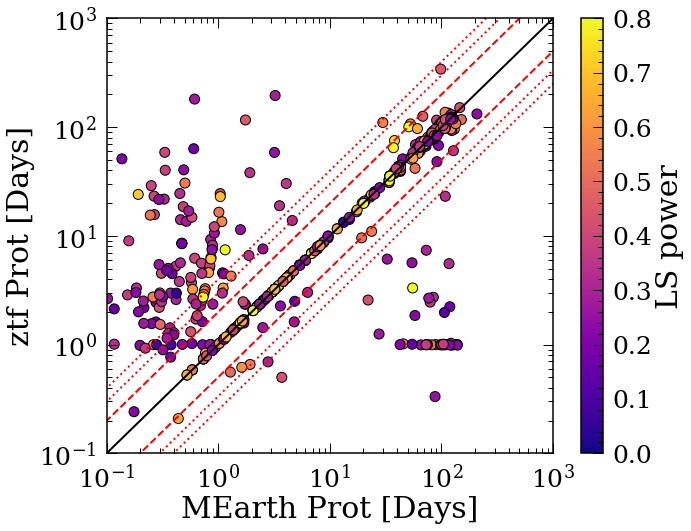

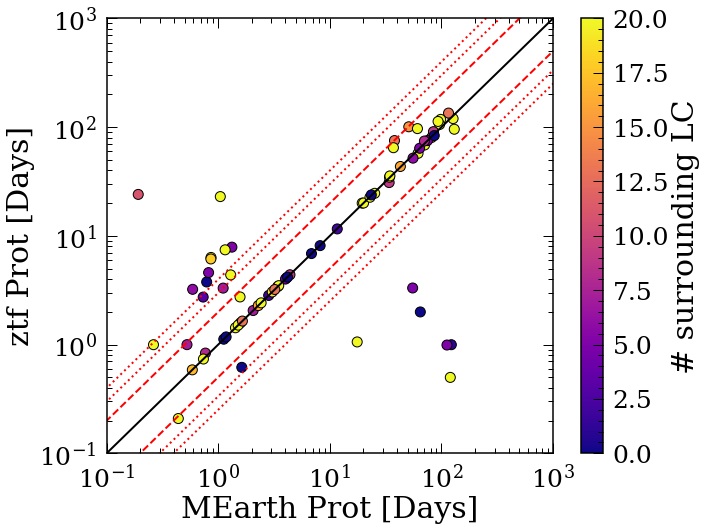

In [91]:
import matplotlib.colors
def getcolor(vrange,cm=plt.cm.get_cmap('jet')):
    cmap = cm
    norm = matplotlib.colors.Normalize(vmin=min(vrange), vmax=max(vrange))
    return [cmap(norm(i)) for i in vrange]
colors = getcolor(np.array([1,2,3,4,5,6]),plt.cm.get_cmap('plasma'))

cmap = plt.cm.get_cmap('plasma')
plt.figure(figsize=(10,8))

prots_pag = df_cm.loc[df_cm['overall']==0].reset_index(drop=True)
plt.scatter(prots_pag['Prot'], prots_pag['bestprot'], 
            c=[max(prots_pag.iloc[i][['maxpower1','maxpower2','maxpower3','maxpower4','maxpower5']]) for i in range(len(prots_pag))], 
            s=100, edgecolor='k', cmap=cmap, vmin=0, vmax=0.8)


for i in range(1,6):
    prots_pag = df_cm.loc[df_cm['overall'+str(i)]==1]
    plt.scatter(prots_pag['Prot'], prots_pag['prot'+str(i)], 
                c=prots_pag['maxpower'+str(i)], s=100, 
                edgecolor='k', label='At least one season agrees', 
                cmap=cmap, vmin=0, vmax=0.8)
    
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,1000], [0,1000], 'k-')
plt.plot([0,3000], [0,6000], 'r--')
plt.plot([0,6000], [0,3000], 'r--')
plt.plot([0,9000], [0,3000], 'r:')
plt.plot([0,12000], [0,3000], 'r:')
plt.plot([0,3000],[0,9000], 'r:')
plt.plot([0,3000], [0,12000], 'r:')
plt.xlim([0.1,1000])
plt.ylim([0.1,1000])

cb = plt.colorbar()
cb.set_label('LS power')



LScut = 0.59
plt.figure(figsize=(10,8))
df_cm['LS_max'] = [max(df_cm.iloc[i][['maxpower1','maxpower2','maxpower3','maxpower4','maxpower5']]) for i in range(len(df_cm))]

m = df_cm['LS_max']>LScut
print(sum((m)&(df_cm['overall']==1))/sum(df_cm['overall']==1),
     sum((m)&(df_cm['overall']==0))/sum(df_cm['overall']==0))
plt.scatter(df_cm['Prot'][m], df_cm['bestprot'][m], 
            c=df_cm['nl'][m], 
            s=100, edgecolor='k', cmap=cmap, vmin=0, vmax=20)
"""
for i in range(1,6):
    m = df_cm['maxpower'+str(i)]>LScut
    plt.scatter(df_cm['Prot'][m], df_cm['prot'+str(i)][m], 
                c=df_cm['maxpower'+str(i)][m], s=100, 
                edgecolor='k', label='At least one season agrees', 
                cmap=cmap, vmin=0, vmax=0.8)
"""   
plt.xscale('log')
plt.yscale('log')
plt.xlabel('MEarth Prot [Days]')
plt.ylabel('ztf Prot [Days]')
plt.plot([0,1000], [0,1000], 'k-')
plt.plot([0,3000], [0,6000], 'r--')
plt.plot([0,6000], [0,3000], 'r--')
plt.plot([0,9000], [0,3000], 'r:')
plt.plot([0,12000], [0,3000], 'r:')
plt.plot([0,3000],[0,9000], 'r:')
plt.plot([0,3000], [0,12000], 'r:')
plt.xlim([0.1,1000])
plt.ylim([0.1,1000])

cb = plt.colorbar()
cb.set_label('# surrounding LC')

<ipython-input-92-d39410058c2b>:12: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.diff(np.linspace(11,17,15))/2+bin1[:-1],freq2/freq1, 'ko-',
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


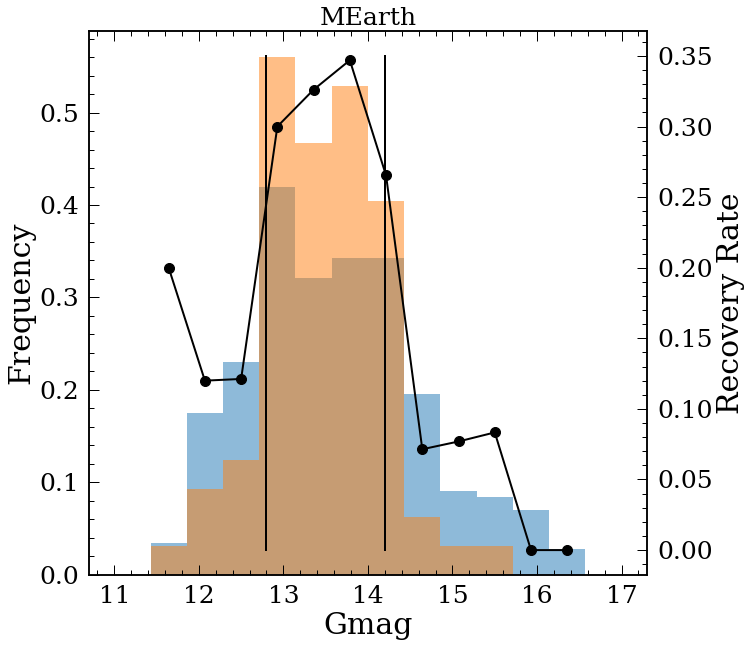

In [92]:
freq1, bin1 = np.histogram(df_cm['Gmag'],bins=np.linspace(11,17,15))
plt.hist(df_cm['Gmag'],alpha=0.5,bins=np.linspace(11,17,15),label='All',density=True)
LScut=0.59
m = df_cm['LS_max']>LScut
freq2, bin2 = np.histogram(df_cm['Gmag'].values[m],bins=np.linspace(11,17,15))
plt.hist(df_cm['Gmag'].values[m],alpha=0.5,bins=np.linspace(11,17,15),
         label='Recovered',density=True)
plt.ylabel('Frequency')
plt.xlabel('Gmag')

plt.twinx()
plt.plot(np.diff(np.linspace(11,17,15))/2+bin1[:-1],freq2/freq1, 'ko-',
        markersize=10)
plt.plot([14.2,14.2], [0,0.35],'k-')
plt.plot([12.8,12.8], [0,0.35],'k-')
plt.ylabel('Recovery Rate')
plt.title("MEarth", fontsize=25)
plt.legend()

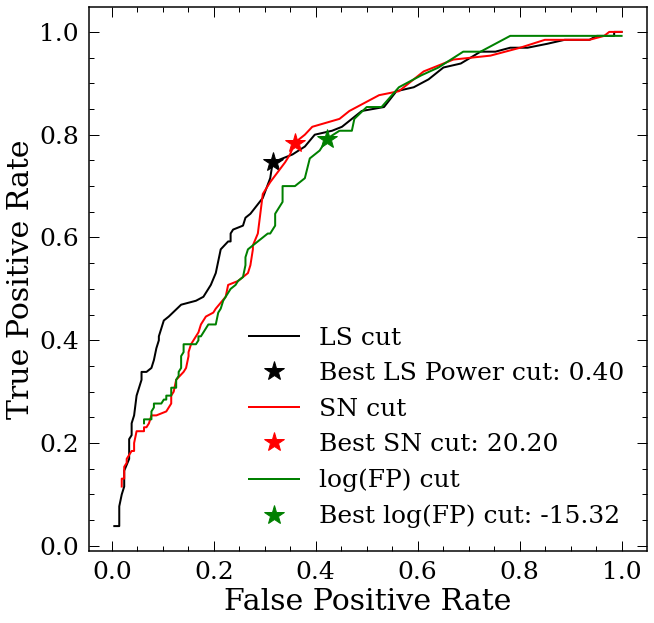

In [93]:
#df_cm = df_cm.loc[(df_cm['Prot']>1)&(df_cm['bestprot']>1)].reset_index(drop=True)


df_cm['LS_max'] = [max(df_cm.iloc[i][['maxpower1','maxpower2','maxpower3','maxpower4','maxpower5']]) for i in range(len(df_cm))]
df_cm['SNmax'] = [max(df_cm.iloc[i][['SN1','SN2','SN3','SN4','SN5']]) for i in range(len(df_cm))]
df_cm['FP_min'] = [min(df_cm.iloc[i][['fa1','fa2','fa3','fa4','fa5']]) for i in range(len(df_cm))]


TP = np.zeros(100)
FP = np.zeros(100)
LScut = np.linspace(0,1,100)
SNcut = np.linspace(0,100,100)
for i in range(len(LScut)):
    m = df_cm['LS_max']>LScut[i]
    TP[i] = sum((m)&(df_cm['overall']==1))/sum(df_cm['overall']==1)
    FP[i] = sum((m)&(df_cm['overall']==0))/sum(df_cm['overall']==0)

plt.plot(FP, TP, 'k-', label='LS cut')
opLScut = LScut[np.argmax((TP-FP))]
plt.plot(FP[np.argmax(TP-FP)], TP[np.argmax(TP-FP)], 'k*', markersize=20,
    label = 'Best LS Power cut: %.2f'%opLScut)
    
for i in range(len(SNcut)):
    m = df_cm['SNmax']>SNcut[i]
    TP[i] = sum((m)&(df_cm['overall']==1))/sum(df_cm['overall']==1)
    FP[i] = sum((m)&(df_cm['overall']==0))/sum(df_cm['overall']==0)

plt.plot(FP, TP, 'r-', label='SN cut')
opSNcut = SNcut[np.argmax(TP-FP)]
plt.plot(FP[np.argmax(TP-FP)], TP[np.argmax(TP-FP)], 'r*', markersize=20,
    label = 'Best SN cut: %.2f'%opSNcut)


TP = np.zeros(100)
FP = np.zeros(100)
FPcut = np.linspace(-100,1,100)
for i in range(len(FPcut)):
    m = np.log(df_cm['FP_min'])<FPcut[i]
    TP[i] = sum((m)&(df_cm['overall']==1))/sum(df_cm['overall']==1)
    FP[i] = sum((m)&(df_cm['overall']==0))/sum(df_cm['overall']==0)
    
plt.plot(FP, TP, 'g-', label='log(FP) cut')
opFPcut = FPcut[np.argmax(TP-FP)]
plt.plot(FP[np.argmax(TP-FP)], TP[np.argmax(TP-FP)], 'g*', markersize=20,
    label = 'Best log(FP) cut: %.2f'%opFPcut)


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.legend()
